# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

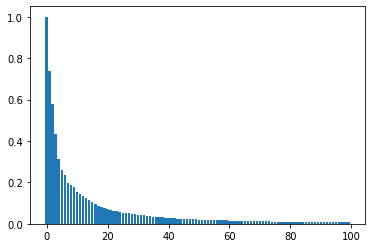

In [2]:
# DATA CORRESPONDING TO MY NUMBER
import warnings
warnings.filterwarnings('ignore')

my_number = 3
remove = []
DIMENSION = 784

for i in range(train_data.shape[0]):
    if train_labels[i] != my_number:
        remove.append(i)
        
train_data1 = np.copy(train_data)
train_labels1 = np.copy(train_labels)

train_data1 = np.delete(train_data1,remove,0)
train_labels1 = np.delete(train_labels1,remove,0)

x = np.empty((0,train_data1.shape[0]))
for i in range(train_data1.shape[1]):
    x = np.vstack([x,train_data1[:,i]])

COV = np.cov(x)
val , vec = np.linalg.eig(COV)
val.sort()

plt.bar(range(100),np.flip(val)[0:100]/np.max(val))
plt.show()

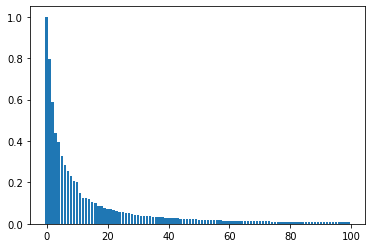

In [3]:
# DATA CORRESPONDING TO MY NUMBER+1
my_number = 4
remove = []
DIMENSION = 784

for i in range(train_data.shape[0]):
    if train_labels[i] != my_number:
        remove.append(i)

train_data1 = np.copy(train_data)
train_labels1 = np.copy(train_labels)

train_data1 = np.delete(train_data1,remove,0)
train_labels1 = np.delete(train_labels1,remove,0)

x = np.empty((0,train_data1.shape[0]))
for i in range(train_data1.shape[1]):
    x = np.vstack([x,train_data1[:,i]])

COV = np.cov(x)
val , vec = np.linalg.eig(COV)
val.sort()

plt.bar(range(100),np.flip(val)[0:100]/np.max(val))
plt.show()

(6000, 784)


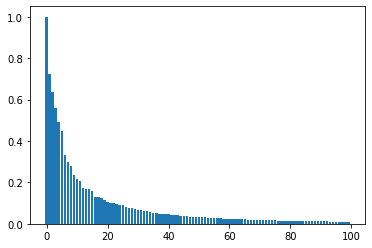

In [4]:
# ALL DATA SAMPLES
DIMENSION = 784

train_data1 = np.copy(train_data)
train_labels1 = np.copy(train_labels)

x = np.empty((0,train_data1.shape[0]))
for i in range(train_data1.shape[1]):
    x = np.vstack([x,train_data1[:,i]])

COV = np.cov(x)
val , vec = np.linalg.eig(COV)
val.sort()
print(train_data1.shape)
plt.bar(range(100),np.flip(val)[0:100]/np.max(val))
plt.show()

(3000, 784)


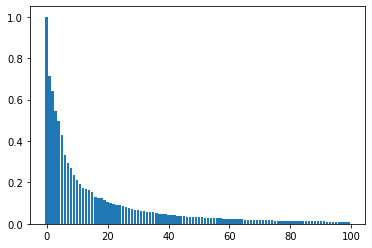

In [5]:
# RANDOM 50% DATA SAMPLES
remove = np.random.choice(np.arange(train_data.shape[0]),int(train_data.shape[0]/2),False)
DIMENSION = 784

train_data1 = np.copy(train_data)
train_labels1 = np.copy(train_labels)

train_data1 = np.delete(train_data1,remove,0)
train_labels1 = np.delete(train_labels1,remove,0)

x = np.empty((0,train_data1.shape[0]))
for i in range(train_data1.shape[1]):
    x = np.vstack([x,train_data1[:,i]])

COV = np.cov(x)
val , vec = np.linalg.eig(COV)
val.sort()
print(train_data1.shape)
plt.bar(range(100),np.flip(val)[0:100]/np.max(val))
plt.show()

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
* <font color=blue>Plots __a__ and __b__ are *similar*. This is because all vectors are somewhat similar to one another and thus covariance matrix will have lower approximate rank.</font>
* <font color=blue> plots __b__ and __c__ are *different* because in __c__ we take all numbers into consideration and thus many eigenvectors are of high magnitude, but in __b__ they can be approximately described by few eigenvectors as it represents the same number.
</font>
* <font color = "blue">Number of eigenvalues above 0.5 for __a__ and __b__ are *2* and for __c__ and __d__ it is *5*. Thus 1<sup>st</sup> two will have lower approximate rank than next two</font>
---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
* <font color=blue>2<sup>784</sup> distinct images</font>
* <font color=blue>$100 \times \frac{7000}{2^{784}}$ &rightarrow; 0%</font>
* <font color=blue>Since all possible images would be possible there wouldn't be any correlation between any two dimensions thus covariance matrix would be a diagonal matrix and their **magnitudes would be the same** due to symmetry.</font>
---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

<font color=blue>Multiplication by orthonormal matrix is same as rotation without any scaling. Therefore magnitude of stretching along various axis will remain the *same*.Therefore eigenspectrum **will not change**</font>

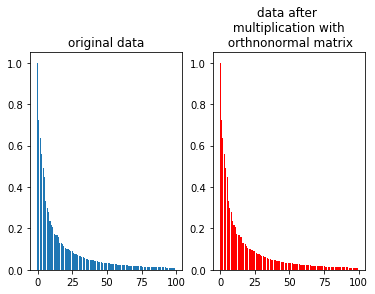

In [6]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

DIMENSION = 784

Randarray = np.random.rand(DIMENSION,DIMENSION)
[orthonormal,upper_triangular] = np.linalg.qr(Randarray)

train_data1 = np.copy(train_data)
train_data2 = np.copy(train_data)

for i in range(train_data2.shape[0]):
    train_data2[i,:] = np.dot(orthonormal,train_data1[i,:]);
    
x = np.empty((0,train_data1.shape[0]))
x2 = np.empty((0,train_data2.shape[0]))
for i in range(train_data1.shape[1]):
    x = np.vstack([x,train_data1[:,i]])
    x2 = np.vstack([x2,train_data2[:,i]])

COV = np.cov(x)
COV2 = np.cov(x2)
val , vec = np.linalg.eig(COV)
val2 , vec2 = np.linalg.eig(COV2)
val.sort()
val2.sort()
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(100),np.flip(val)[0:100]/np.max(val))
ax1.title.set_text('original data')
ax2.bar(range(100),np.flip(val2)[0:100]/np.max(val2),color=(1.0,0.0,0.0,1.0))
ax2.title.set_text('data after \n multiplication with \n orthnonormal matrix')
plt.show()

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

<font color=blue>If samples were multiplied by rank deficient matrix (say of rank k), then number of non-zero eigenvectors will be k. Hence **eigen spectrum will have only 1 or 2 lines** depending on whether we multiply wth matrix of rank 1 or 2.</font>

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

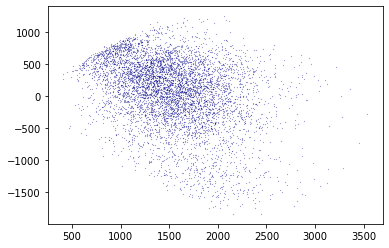

In [7]:
# Plotting code here
[u,s,v]=np.linalg.svd(train_data)
plt.scatter(u[:,0]*s[0],u[:,1]*s[1], color='darkblue', marker='o',s=0.02)
plt.show()

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [ ]:
# Print accuracy on the test set using MLE

import math
def mahan_lobis(v,m,s):
	x = v-m
	Sum = 0
	ST = s.T
	ev,evec = np.linalg.eig(ST)
	prod = np.product([ev[i] for i in range(40)])
	x= np.array(x)
	for i in range(len(v)):
		Sum = Sum + np.dot(x,ST[i])*x[i];
	prod = np.abs(prod)
	prod = prod+1
	prod = math.log(prod)
	return Sum+prod
def mle(T,label):
	best = []
	for i in range(10):
		C = [train_data[x,:] for x in range(train_data.shape[0]) if train_labels[x]==i]
		C = np.array(C)
		C1 = C.T
		S = np.cov(C1)
		M = [np.mean(C[:,i]) for i in range(len(C[0]))]
		dist1 = mahan_lobis(T,M[i],S)
		best.append(dist1)
	return (np.argmax(best)==label)

s = 0
for n in range(test_data.shape[0]):
	T = test_data[n,:]
	s = s+mle(T,test_labels[n])
	if n%30==10:
		print(n+1,s)
print(s/10,'%')

11 8
41 33


In [ ]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)

import math
def mahan_lobis(v,m,s):
	x = v-m
	Sum = 0
	ST = s.T
	ev,evec = np.linalg.eig(ST)
	prod = np.product([ev[i] for i in range(40)])
	x= np.array(x)
	for i in range(len(v)):
		Sum = Sum + np.dot(x,ST[i])*x[i];
	prod = np.abs(prod)
	prod = prod+1
	prod = math.log(prod)
	posterior_knowledge=10;#let
	return Sum+prod+posterior_knowledge
def mle(T,label):
	best = []
	for i in range(10):
		C = [train_data[x,:] for x in range(train_data.shape[0]) if train_labels[x]==i]
		C = np.

In [ ]:
# Print accuracy using Bayesian pairwise majority voting method
def mahan_lobis(v,m,s):
	x = v-m
	Sum = 0
	for i in range(len(v)):
		Sum = Sum + np.dot(x,s[:,i])*x[i];
	return Sum
def samesigma(T,label):
	best = []
	means = []
	sigmas = []
	votes = [0 for i in range(10)]
	for i in range(10):
		C = [train_data[x,:] for x in range(train_data.shape[0]) if train_labels[x]==i]
		C = np.array(C)
		C1 = C.T
		S = np.cov(C1)
		M = [np.mean(C[:,i]) for i in range(len(C[0]))]
		means.append(M)
		sigmas.append(S)
	for i in range(10):
		for j in range(i+1,10):
			s=(sigmas[i]+sigmas[j])/2
			dist1 = mahan_lobis(T,means[i],s)
			dist2 = mahan_lobis(T,means[j],s)
			if dist1<dist2:
				votes[i] = votes[i]+1
			else:
				votes[j] = votes[j]+1
	return (np.argmax(votes)==label)

s = 0
for n in range(test_data.shape[0]):
	T = test_data[n,:]
	s = s+samesigma(T,test_labels[n])
	if n%30==0:
		print(n+1,s)

In [ ]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
def perpBisector(T,label):
	best = []
	means = []
	votes = [0 for i in range(10)]
	for i in range(10):
		C = [train_data[x,:] for x in range(train_data.shape[0]) if train_labels[x]==i]
		C = np.array(C)
		M = [np.mean(C[:,i]) for i in range(len(C[0]))]
		means.append(M)
	for i in range(10):
		for j in range(i+1,10):
			dist1 = np.linalg.norm(means[i]-T)
			dist2 = np.linalg.norm(means[j]-T)
			if dist1<dist2:
				votes[i] = votes[i]+1
			else:
				votes[j] = votes[j]+1
	return (np.argmax(votes)==label)

s = 0
for n in range(test_data.shape[0]):
	T = test_data[n,:]
	s = s+perpBisector(T,test_labels[n])
	if n%30==0:
		print(n+1,s)
print(s/10)

### 1.3.3 Question 4
Compare performances and salient observations

* <font color=blue>MLL and MLE have **same accuracies** because there is no significant knowledge we have about the image we are trying to classify hence it could be any of the 10 numbers.Hence multiplying all by 0.1 doesn't change anything.</font>
* <font color=blue>Simple bisector and voting is faster to run but doesn't give results as accurate as bayesian pairwise.This is because bayesian pairwise uses mahalanobis distance,which takes into account the distribution as well as mean.</font>
* <font color=blue>Large matrix multiplications increases chances for error and hence may result in anomalies.</font>

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [ ]:
# Your code here
# Print accuracies with K = 1, 3, 7
def most_frequent(List): 
    return max(set(List), key = List.count) 

def KNN(k):
	correct = 0
	for i in range(test_data.shape[0]):
		distance = []
		for j in range(train_data.shape[0]):
			temp = [np.linalg.norm(test_data[i,:]-train_data[j,:]),train_labels[j]]
			distance.append(temp)
		distance.sort(key=lambda x:x[0])
		best_labels=[x[1] for x in distance[0:k]]
		by_knn = most_frequent(best_labels)
		if by_knn == test_labels[i]:
			correct = correct+1
	return correct
a1 = KNN(1)#accuracy with K=1
a3 = KNN(3)#accuracy with K=3
a7 = KNN(7)#accuracy with K=7
print("Nearest Neighbour with:")
print("K=1",a1/10,"%")
print("K=3",a3/10,"%")
print("K=7",a7/10,"%")

### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

* <font color=blue>There are some cases where nearest need not be the correct label as it could be an outlier. So we must see more than 1 neighbour. Hence this causes difference in accuracy.</font>
* <font color=blue>If K=1 we are at risk of comparing with an outlier. But taking too many neighbours (high K) means we are also giving weightage to far away neighbours.Hence we test for different values of k.<br>We observe KNN is most accurate for **K=3**.</font>

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [ ]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

In [ ]:
def KNN(k,mixed_data):
	distance = []
	for i in range(train_data.shape[0]):
		temp = [np.linalg.norm(mixed_data-train_data[i,:]),i]
		distance.append(temp)
	distance.sort(key=lambda x: x[0])
	nearest50 = [x[1] for x in distance[0:50]]
	outlier = 1
	for z in nearest50:
		distance = []
		for i in range(train_data.shape[0]):
			if i == z:
				continue
			temp = [np.linalg.norm(train_data[z]-train_data[i,:]),i]
			distance.append(temp)
		distance.sort(key=lambda x:x[0])
		reversenearest = distance[k-1][0]
		if reversenearest >= np.linalg.norm(train_data[z]-mixed_data):
			outlier = 0
	return outlier

for k in [1,3,7]:
	s = 0
	for i in range(mixed_data.shape[0]):
		s = s+KNN(k,mixed_data[i,:])
	print("Number of outliers with k=",k,":",s)


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

<font color=blue>With NN we predict classID, then we divide by 10 and this is predicted neatness score.</font>

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [ ]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)
# Your code here
# Your code here
# Print accuracies with K = 1, 3, 7
def most_frequent(List): 
    return max(set(List), key = List.count) 

def KNN(k):
	error = 0
	for i in range(test_data.shape[0]):
		distance = []
		for j in range(train_data.shape[0]):
			temp = [np.linalg.norm(test_data[i,:]-train_data[j,:]),train_labels[j]]
			distance.append(temp)
		distance.sort(key=lambda x:x[0])
		best_labels=[x[1] for x in distance[0:k]]
		by_knn = most_frequent(best_labels)
		error = error+abs(by_knn-test_labels[i])/10;
	return error/1000
e1=KNN(1)
e3=KNN(3)
e7=KNN(7)
print("Error when k=:1",e1)
print("Error when k=:3",e3)
print("Error when k=:7",e7)

---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---